# Reading outputs from E+

In [6]:
# some initial set up
# if you have not installed epp, and only downloaded it
# you will need the following lines
import sys
# pathnameto_eppy = 'c:/eppy'
pathnameto_eppy = '../'
sys.path.append(pathnameto_eppy) 


## Using titletable() to get at the tables

So far we have been making changes to the IDF input file.
How about looking at the outputs.

Energyplus makes nice htmlout files that look like this.

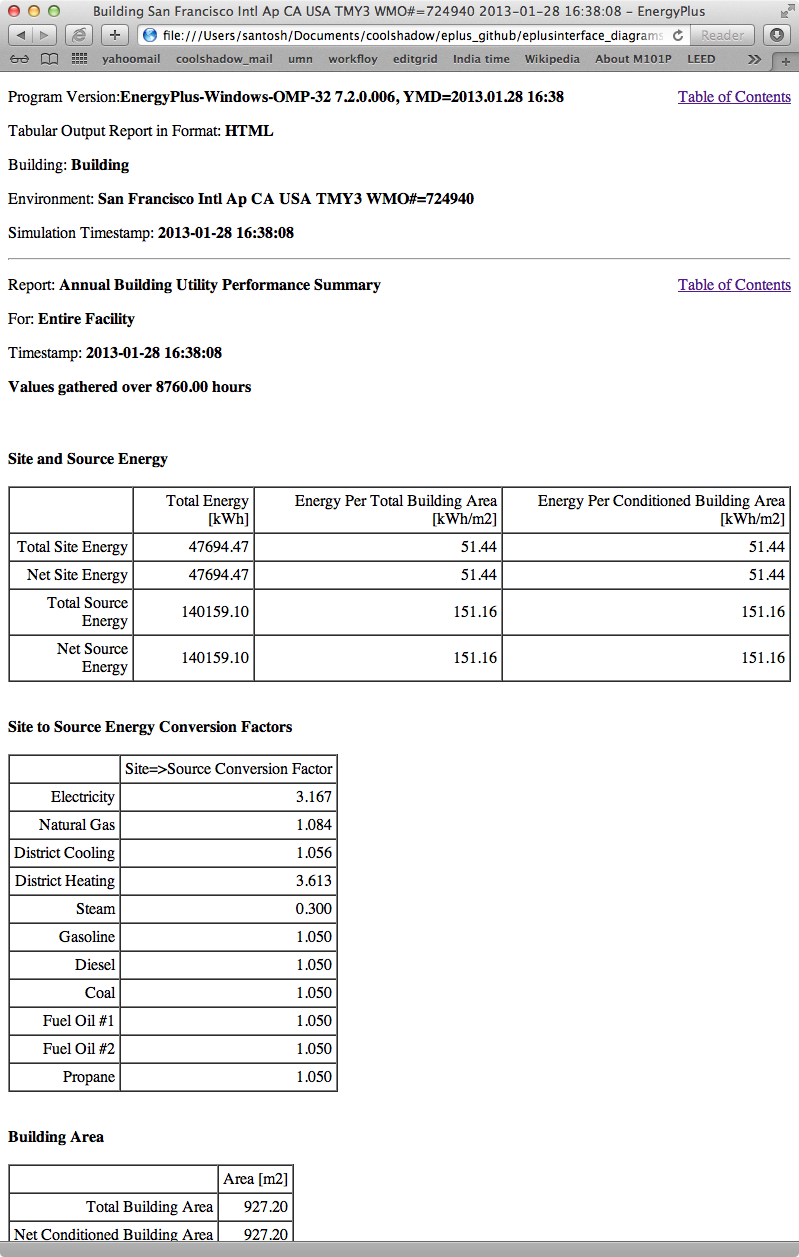

In [7]:
import ex_inits #no need to know this code, it just shows the image below
for_images = ex_inits
for_images.display_png(for_images.html_snippet1) #display the image below


If you look at the clipping of the html file above, you see tables with data in them. Eppy has functions that let you access of these tables and get the data from any of it's cells.

Let us say you want to find the "Net Site Energy".  

This is in table "Site and Source Energy".  

The number you want is in the third row, second column and it's value is "47694.47"

Let us use eppy to extract this number


In [8]:
from eppy.results import readhtml # the eppy module with functions to read the html
fname = "../eppy/resources/outputfiles/V_7_2/5ZoneCAVtoVAVWarmestTempFlowTable_ABUPS.html" # the html file you want to read
filehandle = open(fname, 'r').read()


htables = readhtml.titletable(filehandle) # reads the tables with their titles


If you open the python file readhtml.py and look at the function titletable, you can see the function documentation.

It says the following

In [9]:
    """return a list of [(title, table), .....]
    title = previous item with a <b> tag
    table = rows -> [[cell1, cell2, ..], [cell1, cell2, ..], ..]"""
    

'return a list of [(title, table), .....]\ntitle = previous item with a <b> tag\ntable = rows -> [[cell1, cell2, ..], [cell1, cell2, ..], ..]'

The documentation says that it returns a list.
Let us take a look inside this list.
Let us look at the first item in the list.

In [10]:
firstitem = htables[0]
print(firstitem)


('Site and Source Energy', [['', 'Total Energy [kWh]', 'Energy Per Total Building Area [kWh/m2]', 'Energy Per Conditioned Building Area [kWh/m2]'], ['Total Site Energy', 47694.47, 51.44, 51.44], ['Net Site Energy', 47694.47, 51.44, 51.44], ['Total Source Energy', 140159.1, 151.16, 151.16], ['Net Source Energy', 140159.1, 151.16, 151.16]])


Ughh !!! that is ugly. Hard to see what it is.  
Let us use a python module to print it pretty

In [11]:
import pprint
pp = pprint.PrettyPrinter()
pp.pprint(firstitem)


('Site and Source Energy',
 [['',
   'Total Energy [kWh]',
   'Energy Per Total Building Area [kWh/m2]',
   'Energy Per Conditioned Building Area [kWh/m2]'],
  ['Total Site Energy', 47694.47, 51.44, 51.44],
  ['Net Site Energy', 47694.47, 51.44, 51.44],
  ['Total Source Energy', 140159.1, 151.16, 151.16],
  ['Net Source Energy', 140159.1, 151.16, 151.16]])


Nice. that is a little clearer

In [12]:
firstitem_title = firstitem[0]
pp.pprint(firstitem_title)


'Site and Source Energy'


In [13]:
firstitem_table = firstitem[1]
pp.pprint(firstitem_table)


[['',
  'Total Energy [kWh]',
  'Energy Per Total Building Area [kWh/m2]',
  'Energy Per Conditioned Building Area [kWh/m2]'],
 ['Total Site Energy', 47694.47, 51.44, 51.44],
 ['Net Site Energy', 47694.47, 51.44, 51.44],
 ['Total Source Energy', 140159.1, 151.16, 151.16],
 ['Net Source Energy', 140159.1, 151.16, 151.16]]


How do we get to value of "Net Site Energy".  
We know it is in the third row, second column of the table.  

Easy.

In [14]:
thirdrow = firstitem_table[2] # we start counting with 0. So 0, 1, 2 is third row
print(thirdrow)


['Net Site Energy', 47694.47, 51.44, 51.44]


In [15]:
thirdrow_secondcolumn = thirdrow[1]
thirdrow_secondcolumn


47694.47

the text from the html table is in unicode.  
That is why you see that weird 'u' letter.  

Let us convert it to a floating point number

In [16]:
net_site_energy = float(thirdrow_secondcolumn)
net_site_energy


47694.47

Let us have a little fun with the tables.  

Get the titles of all the tables

In [17]:
alltitles = [htable[0] for htable in htables]
alltitles


['Site and Source Energy',
 'Site to Source Energy Conversion Factors',
 'Building Area',
 'End Uses',
 'End Uses By Subcategory',
 'Utility Use Per Conditioned Floor Area',
 'Utility Use Per Total Floor Area',
 'Electric Loads Satisfied',
 'On-Site Thermal Sources',
 'Water Source Summary',
 'Comfort and Setpoint Not Met Summary',
 'Comfort and Setpoint Not Met Summary']

Now let us grab the tables with the titles "Building Area" and "Site to Source Energy Conversion Factors"

twotables = [htable for htable in htables if htable[0] in ["Building Area", "Site to Source Energy Conversion Factors"]]
twotables

Let us leave readtables for now. 

It gives us the basic functionality to read any of the tables in the html output file.

## Fast HTML table file read

The  function`readhtml.titletable()` will be slow with extremeley large files. If you are dealing with a very large file use the following functions

In [18]:
from eppy.results import fasthtml
fname = "../eppy/resources/outputfiles/V_7_2/5ZoneCAVtoVAVWarmestTempFlowTable_ABUPS.html" # the html file you want to read
filehandle = open(fname, 'r') # get a file handle to the html file

In [19]:
firsttable = fasthtml.tablebyindex(filehandle, 0)
pp.pprint(firstitem)

('Site and Source Energy',
 [['',
   'Total Energy [kWh]',
   'Energy Per Total Building Area [kWh/m2]',
   'Energy Per Conditioned Building Area [kWh/m2]'],
  ['Total Site Energy', 47694.47, 51.44, 51.44],
  ['Net Site Energy', 47694.47, 51.44, 51.44],
  ['Total Source Energy', 140159.1, 151.16, 151.16],
  ['Net Source Energy', 140159.1, 151.16, 151.16]])


In [20]:
filehandle = open(fname, 'r') # get a file handle to the html file
namedtable = fasthtml.tablebyname(filehandle, "Site and Source Energy")
pp.pprint(namedtable)

['Site and Source Energy',
 [['',
   'Total Energy [kWh]',
   'Energy Per Total Building Area [kWh/m2]',
   'Energy Per Conditioned Building Area [kWh/m2]'],
  ['Total Site Energy', 47694.47, 51.44, 51.44],
  ['Net Site Energy', 47694.47, 51.44, 51.44],
  ['Total Source Energy', 140159.1, 151.16, 151.16],
  ['Net Source Energy', 140159.1, 151.16, 151.16]]]


- You can read only one table at a time
- You need to open the file each time you call the function. The function will close the file.

## Using lines_table() to get at the tables

We have been using titletable() to get at the tables. There is a constraint using function titletable(). Titletable() assumes that there is a unique title (in HTML bold) just above the table. It is assumed that this title will adequetly describe the table. This is true in most cases and titletable() is perfectly good to use. Unfortuntely there are some tables that do not follow this rule. The snippet below shows one of them.

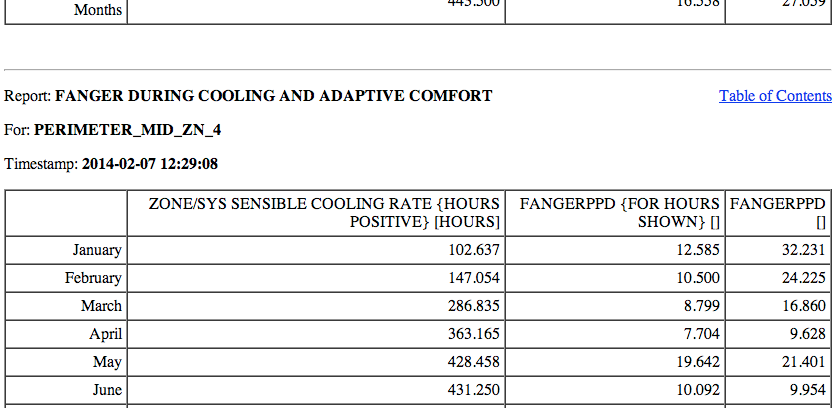

In [21]:
import ex_inits #no need to know this code, it just shows the image below
for_images = ex_inits
for_images.display_png(for_images.html_snippet2) # display the image below


Notice that the HTML snippet shows a table with three lines above it. The first two lines have information that describe the table. We need to look at both those lines to understand what the table contains. So we need a different function that will capture all those lines before the table. The funtion lines_table() described below will do this.


In [22]:
from eppy.results import readhtml # the eppy module with functions to read the html
fname = "../eppy/resources/outputfiles/V_8_1/ASHRAE30pct.PI.Final11_OfficeMedium_STD2010_Chicago-baseTable.html" # the html file you want to read
filehandle = open(fname, 'r').read() # get a file handle to the html file


ltables = readhtml.lines_table(filehandle) # reads the tables with their titles


The html snippet shown above is the last table in HTML file we just opened. We have used lines_table() to read the tables into the variable ltables. We can get to the last table by ltable[-1]. Let us print it and see what we have.


In [23]:
import pprint
pp = pprint.PrettyPrinter()
pp.pprint(ltables[-1])


[['Table of Contents',
  'Report: FANGER DURING COOLING AND ADAPTIVE COMFORT',
  'For: PERIMETER_MID_ZN_4',
  'Timestamp: 2014-02-07\n    12:29:08'],
 [['',
   'ZONE/SYS SENSIBLE COOLING RATE {HOURS POSITIVE} [HOURS]',
   'FANGERPPD {FOR HOURS SHOWN} []',
   'FANGERPPD []'],
  ['January', 102.637, 12.585, 32.231],
  ['February', 147.054, 10.5, 24.225],
  ['March', 286.835, 8.799, 16.86],
  ['April', 363.165, 7.704, 9.628],
  ['May', 428.458, 19.642, 21.401],
  ['June', 431.25, 10.092, 9.954],
  ['July', 432.134, 8.835, 7.959],
  ['August', 443.5, 9.743, 8.785],
  ['September', 408.833, 15.91, 14.855],
  ['October', 383.652, 6.919, 7.57],
  ['November', 243.114, 8.567, 15.256],
  ['December', 91.926, 14.298, 29.001],
  ['\xa0', '\xa0', '\xa0', '\xa0'],
  ['Annual Sum or Average', 3762.56, 11.062, 16.458],
  ['Minimum of Months', 91.926, 6.919, 7.57],
  ['Maximum of Months', 443.5, 19.642, 32.231]]]


We can see that ltables has captured all the lines before the table. Let us make our code more explicit to see this

In [24]:
last_ltable = ltables[-1]
lines_before_table = last_ltable[0]
table_itself = last_ltable[-1]

pp.pprint(lines_before_table)


['Table of Contents',
 'Report: FANGER DURING COOLING AND ADAPTIVE COMFORT',
 'For: PERIMETER_MID_ZN_4',
 'Timestamp: 2014-02-07\n    12:29:08']


We found this table the easy way this time, because we knew it was the last one. How do we find it if we don't know where it is in the file ? Python comes to our rescue :-) Let assume that we want to find the table that has the following two lines before it.

- Report: FANGER DURING COOLING AND ADAPTIVE COMFORT
- For: PERIMETER_MID_ZN_4


In [25]:
line1 = 'Report: FANGER DURING COOLING AND ADAPTIVE COMFORT'
line2 = 'For: PERIMETER_MID_ZN_4'
#
# check if those two lines are before the table
line1 in lines_before_table and line2 in lines_before_table


True

In [26]:
# find all the tables where those two lines are before the table
[ltable for ltable in ltables 
    if line1 in ltable[0] and line2 in ltable[0]]


[[['Table of Contents',
   'Report: FANGER DURING COOLING AND ADAPTIVE COMFORT',
   'For: PERIMETER_MID_ZN_4',
   'Timestamp: 2014-02-07\n    12:29:08'],
  [['',
    'ZONE/SYS SENSIBLE COOLING RATE {HOURS POSITIVE} [HOURS]',
    'FANGERPPD {FOR HOURS SHOWN} []',
    'FANGERPPD []'],
   ['January', 102.637, 12.585, 32.231],
   ['February', 147.054, 10.5, 24.225],
   ['March', 286.835, 8.799, 16.86],
   ['April', 363.165, 7.704, 9.628],
   ['May', 428.458, 19.642, 21.401],
   ['June', 431.25, 10.092, 9.954],
   ['July', 432.134, 8.835, 7.959],
   ['August', 443.5, 9.743, 8.785],
   ['September', 408.833, 15.91, 14.855],
   ['October', 383.652, 6.919, 7.57],
   ['November', 243.114, 8.567, 15.256],
   ['December', 91.926, 14.298, 29.001],
   ['\xa0', '\xa0', '\xa0', '\xa0'],
   ['Annual Sum or Average', 3762.56, 11.062, 16.458],
   ['Minimum of Months', 91.926, 6.919, 7.57],
   ['Maximum of Months', 443.5, 19.642, 32.231]]]]

That worked !

What if you want to find the words "FANGER"  and "PERIMETER_MID_ZN_4" before the table. The following code will do it.


In [27]:
# sample code to illustrate what we are going to do
last_ltable = ltables[-1]
lines_before_table = last_ltable[0]
table_itself = last_ltable[-1]

# join lines_before_table into a paragraph of text
justtext = '\n'.join(lines_before_table)
print(justtext)


Table of Contents
Report: FANGER DURING COOLING AND ADAPTIVE COMFORT
For: PERIMETER_MID_ZN_4
Timestamp: 2014-02-07
    12:29:08


In [28]:
"FANGER" in justtext and "PERIMETER_MID_ZN_4" in justtext


True

In [29]:
# Let us combine the this trick to find the table
[ltable for ltable in ltables 
    if "FANGER" in '\n'.join(ltable[0]) and "PERIMETER_MID_ZN_4" in '\n'.join(ltable[0])]

[[['Table of Contents',
   'Report: FANGER DURING COOLING AND ADAPTIVE COMFORT',
   'For: PERIMETER_MID_ZN_4',
   'Timestamp: 2014-02-07\n    12:29:08'],
  [['',
    'ZONE/SYS SENSIBLE COOLING RATE {HOURS POSITIVE} [HOURS]',
    'FANGERPPD {FOR HOURS SHOWN} []',
    'FANGERPPD []'],
   ['January', 102.637, 12.585, 32.231],
   ['February', 147.054, 10.5, 24.225],
   ['March', 286.835, 8.799, 16.86],
   ['April', 363.165, 7.704, 9.628],
   ['May', 428.458, 19.642, 21.401],
   ['June', 431.25, 10.092, 9.954],
   ['July', 432.134, 8.835, 7.959],
   ['August', 443.5, 9.743, 8.785],
   ['September', 408.833, 15.91, 14.855],
   ['October', 383.652, 6.919, 7.57],
   ['November', 243.114, 8.567, 15.256],
   ['December', 91.926, 14.298, 29.001],
   ['\xa0', '\xa0', '\xa0', '\xa0'],
   ['Annual Sum or Average', 3762.56, 11.062, 16.458],
   ['Minimum of Months', 91.926, 6.919, 7.57],
   ['Maximum of Months', 443.5, 19.642, 32.231]]]]

## Extracting data from the tables

The tables in the HTML page in general have text in the top header row. The first vertical row has text. The remaining cells have numbers. We can identify the numbers we need by looking at the labelin the top row and the label in the first column. Let us construct a simple example and explore this.

In [30]:
# ignore the following three lines. I am using them to construct the table below
from IPython.display import HTML
atablestring = '<TABLE cellpadding="4" style="border: 1px solid #000000; border-collapse: collapse;" border="1">\n <TR>\n  <TD>&nbsp;</TD>\n  <TD>a b</TD>\n  <TD>b c</TD>\n  <TD>c d</TD>\n </TR>\n <TR>\n  <TD>x y</TD>\n  <TD>1</TD>\n  <TD>2</TD>\n  <TD>3</TD>\n </TR>\n <TR>\n  <TD>y z</TD>\n  <TD>4</TD>\n  <TD>5</TD>\n  <TD>6</TD>\n </TR>\n <TR>\n  <TD>z z</TD>\n  <TD>7</TD>\n  <TD>8</TD>\n  <TD>9</TD>\n </TR>\n</TABLE>'
HTML(atablestring)


This table is actually in the follwoing form:

In [31]:
atable = [["",  "a b", "b c", "c d"],
     ["x y", 1,     2,     3 ],
     ["y z", 4,     5,     6 ],
     ["z z", 7,     8,     9 ],]


We can see the labels in the table. So we an look at row "x y" and column "c d". The value there is 3

right now we can get to it by saying atable[1][3]

In [32]:
print(atable[1][3])

3


readhtml has some functions that will let us address the values by the labels. We use a structure from python called named tuples to do this. The only limitation is that the labels have to be letters or digits. Named tuples does not allow spaces in the labels. We could replace the space with an underscore ' _ '. So "a b" will become "a_b". So we can look for row "x_y" and column "c_d". Let us try this out.

In [33]:
from eppy.results import readhtml
h_table = readhtml.named_grid_h(atable)


In [34]:
print(h_table.x_y.c_d)


3


We can still get to the value by index

In [35]:
print(h_table[0][2])


3


Note that we used atable[1][3], but here we used h_table[0][2]. That is because h_table does not count the rows and columns where the labels are.

We can also do the following:

In [36]:
print(h_table.x_y[2])
# or
print(h_table[0].c_d)


3
3


Wow … that is pretty cool. What if we want to just check what the labels are ?

In [37]:
print(h_table._fields)


('x_y', 'y_z', 'z_z')


That gives us the horizontal lables. How about the vertical labels ?

In [38]:
h_table.x_y._fields


('a_b', 'b_c', 'c_d')

There you go !!!

How about if I want to use the labels differently ? Say I want to refer to the row first and then to the column. That woul be saying table.c_d.x_y. We can do that by using a different function

In [39]:
v_table = readhtml.named_grid_v(atable)
print(v_table.c_d.x_y)


3


And we can do the following

In [40]:
print(v_table[2][0])
print(v_table.c_d[0])
print(v_table[2].x_y)


3
3
3


Let us try to get the numbers in the first column and then get their sum

In [41]:
v_table.a_b


ntrow(x_y=1, y_z=4, z_z=7)

Look like we got the right column. But not in the right format. We really need a list of numbers

In [42]:
[cell for cell in v_table.a_b]


[1, 4, 7]

That looks like waht we wanted. Now let us get the sum

In [43]:
values_in_first_column = [cell for cell in v_table.a_b]
print(values_in_first_column)
print(sum(values_in_first_column)) # sum is a builtin function that will sum a list


[1, 4, 7]
12


To get the first row we use the variable h_table

In [44]:
values_in_first_row = [cell for cell in h_table.x_y]
print(values_in_first_row)
print(sum(values_in_first_row))


[1, 2, 3]
6


## Fast HTML table file read

To read the html table files you would usually use the functions described in [Reading outputs from E+](./Outputs_Tutorial.html). For instance you would use the functions as shown below.

In [45]:
from eppy.results import readhtml # the eppy module with functions to read the html
import pprint
pp = pprint.PrettyPrinter()

fname = "../eppy/resources/outputfiles/V_7_2/5ZoneCAVtoVAVWarmestTempFlowTable_ABUPS.html" # the html file you want to read
html_doc = open(fname, 'r').read() 


htables = readhtml.titletable(html_doc) # reads the tables with their titles
firstitem = htables[0]
pp.pprint(firstitem)

('Site and Source Energy',
 [['',
   'Total Energy [kWh]',
   'Energy Per Total Building Area [kWh/m2]',
   'Energy Per Conditioned Building Area [kWh/m2]'],
  ['Total Site Energy', 47694.47, 51.44, 51.44],
  ['Net Site Energy', 47694.47, 51.44, 51.44],
  ['Total Source Energy', 140159.1, 151.16, 151.16],
  ['Net Source Energy', 140159.1, 151.16, 151.16]])


`titletable` reads all the tables in the HTML file. With large E+ models, this file can be extremeely large and `titletable` will load all the tables into memory. This can take several minutes. If you are trying to get one table or one value from a table, waiting several minutes for you reseult can be exessive.

If you know which table you are looking for, there is a faster way of doing this. We used index=0 in the above example to get the first table. If you know the index of the file you are looking for, you can use a faster function to get the table as shown below

In [46]:
from eppy.results import fasthtml
fname = "../eppy/resources/outputfiles/V_7_2/5ZoneCAVtoVAVWarmestTempFlowTable_ABUPS.html" # the html file you want to read
filehandle = open(fname, 'r') # get a file handle to the html file

In [47]:
firsttable = fasthtml.tablebyindex(filehandle, 0)
pp.pprint(firstitem)

('Site and Source Energy',
 [['',
   'Total Energy [kWh]',
   'Energy Per Total Building Area [kWh/m2]',
   'Energy Per Conditioned Building Area [kWh/m2]'],
  ['Total Site Energy', 47694.47, 51.44, 51.44],
  ['Net Site Energy', 47694.47, 51.44, 51.44],
  ['Total Source Energy', 140159.1, 151.16, 151.16],
  ['Net Source Energy', 140159.1, 151.16, 151.16]])


You can also get the table if you know the title of the table. This is the **bold** text just before the table in the HTML file. The title of our table is **Site and Source Energy**. The function `tablebyname` will get us the table.

In [48]:
filehandle = open(fname, 'r') # get a file handle to the html file
namedtable = fasthtml.tablebyname(filehandle, "Site and Source Energy")
pp.pprint(namedtable)

['Site and Source Energy',
 [['',
   'Total Energy [kWh]',
   'Energy Per Total Building Area [kWh/m2]',
   'Energy Per Conditioned Building Area [kWh/m2]'],
  ['Total Site Energy', 47694.47, 51.44, 51.44],
  ['Net Site Energy', 47694.47, 51.44, 51.44],
  ['Total Source Energy', 140159.1, 151.16, 151.16],
  ['Net Source Energy', 140159.1, 151.16, 151.16]]]


Couple of things to note here:

- We have to open the file again using `filehandle = open(fname, 'r')`
    - This is because both `tablebyname` and `tablebyindex` will close the file once they are done 
- Some tables do not have a **bold title** just before the table. `tablebyname` will not work for those functions